In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Load data

In [3]:
mpo_step_500 = pd.read_csv("data/step_data/mpo_500_steps_scores.csv")
her2_step_500 = pd.read_csv("data/step_data/her2_500_steps_scores.csv")

# Plot step figure

In [4]:
def plot_step_curve(ax, prop, ylabel=None, yrefs=[]):
    tlabel = prop if ylabel is None else ylabel
    
    for yc in yrefs:
        ax.axhline(y=yc, ls=':', label=f"y={yc:4.2f}")
    
    df = her2_step_500[['step', prop]].groupby('step').mean()
    ax.plot(df.index.values, df[prop].values, label="Agent_HER2")
    
    df = mpo_step_500[['step', prop]].groupby('step').mean()
    ax.plot(df.index.values, df[prop].values, label="Agent_MPO")
    ax.set_xlabel('Step')
    ax.set_ylabel(ylabel)
    ax.legend()

In [5]:
def plot_HER2_step_curve(ax, prop, ylabel=None):
    tlabel = prop if ylabel is None else ylabel
    
    yref=0.7
    ax.axhline(y=yref, ls=':', label=f"y={yref:4.2f}")
    ax.annotate('', xy=(80,yref+0.07), xytext=(80,yref), arrowprops={'arrowstyle': '-|>'}, va='center')
    
    df = her2_step_500[['step', prop]].groupby('step').mean()
    ax.plot(df.index.values, df[prop].values, label="Agent_HER2")
    
    df = mpo_step_500[['step', prop]].groupby('step').mean()
    ax.plot(df.index.values, df[prop].values, label="Agent_MPO")
    ax.set_xlabel('Step')
    ax.set_ylabel(ylabel)
    ax.legend()

In [6]:
def plot_FvNetCharge_step_curve(ax, prop, ylabel=None):
    tlabel = prop if ylabel is None else ylabel
    
    yref=6.20
    ax.axhline(y=yref, ls=':', label=f"y={yref:4.2f}")
    ax.annotate('', xy=(15,yref-0.17), xytext=(15,yref), arrowprops={'arrowstyle': '-|>'}, va='center')
    
    df = her2_step_500[['step', prop]].groupby('step').mean()
    ax.plot(df.index.values, df[prop].values, label="Agent_HER2")
    
    df = mpo_step_500[['step', prop]].groupby('step').mean()
    ax.plot(df.index.values, df[prop].values, label="Agent_MPO")
    ax.set_xlabel('Step')
    ax.set_ylabel(ylabel)
    ax.legend()

In [7]:
def plot_MHC2_step_curve(ax, prop, ylabel=None):
    tlabel = prop if ylabel is None else ylabel
    
    yref=2.51
    ax.axhline(y=yref, ls=':', label=f"y={yref:4.2f}")
    ax.annotate('', xy=(-8,yref+0.3), xytext=(-8,yref), arrowprops={'arrowstyle': '-|>'}, va='center')
    
    df = her2_step_500[['step', prop]].groupby('step').mean()
    ax.plot(df.index.values, df[prop].values, label="Agent_HER2")
    
    df = mpo_step_500[['step', prop]].groupby('step').mean()
    ax.plot(df.index.values, df[prop].values, label="Agent_MPO")
    ax.set_xlabel('Step')
    ax.set_ylabel(ylabel)
    ax.legend()

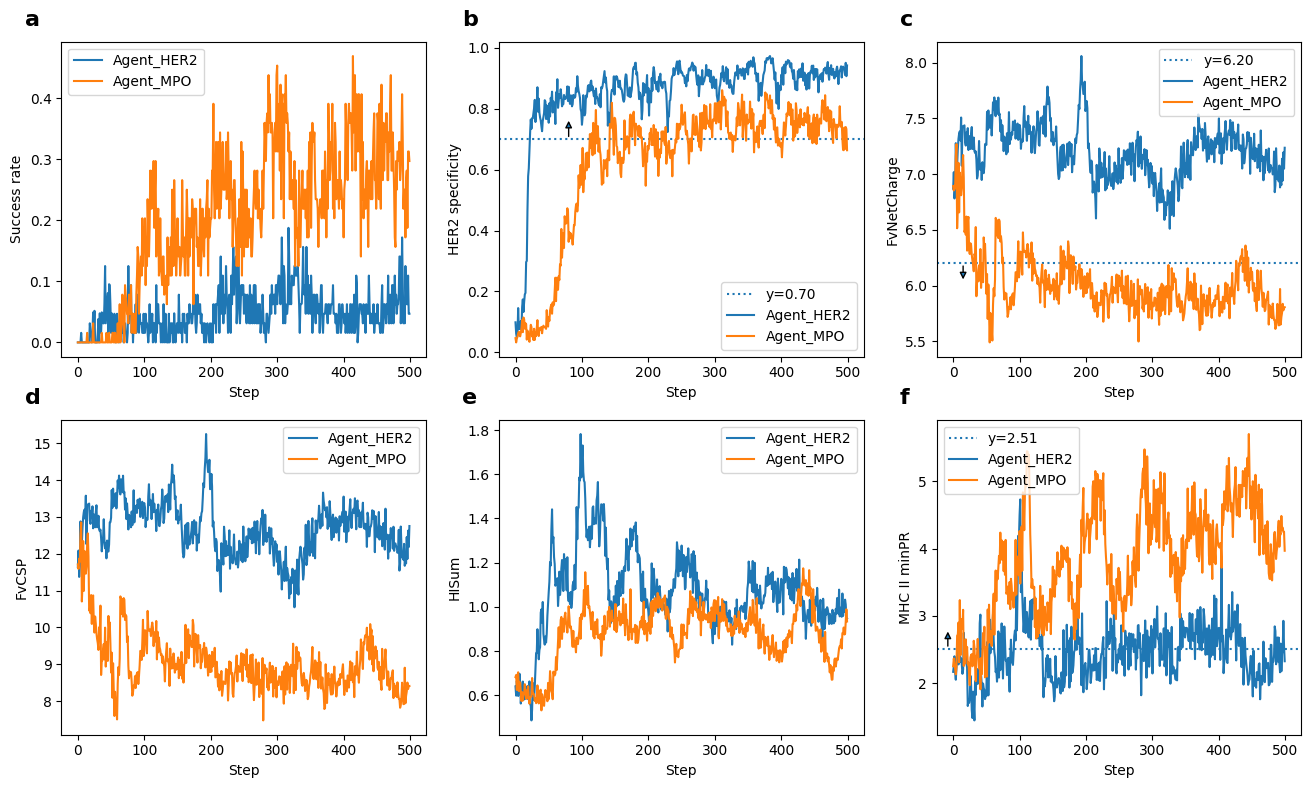

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9))

plot_step_curve(axs[0, 0], 'is_success', ylabel='Success rate')
axs[0, 0].text(-0.1, 1.05, "a", transform=axs[0, 0].transAxes, size=16, weight='bold')

plot_HER2_step_curve(axs[0, 1], 'raw_HER2', ylabel='HER2 specificity')  # >0.7
axs[0, 1].text(-0.1, 1.05, "b", transform=axs[0, 1].transAxes, size=16, weight='bold')

plot_FvNetCharge_step_curve(axs[0, 2], 'raw_FvNetCharge', ylabel='FvNetCharge') # <6.2
axs[0, 2].text(-0.1, 1.05, "c", transform=axs[0, 2].transAxes, size=16, weight='bold')

plot_step_curve(axs[1, 0], 'raw_FvCSP', ylabel='FvCSP', yrefs=[])  #>6.61
axs[1, 0].text(-0.1, 1.05, "d", transform=axs[1, 0].transAxes, size=16, weight='bold')

plot_step_curve(axs[1, 1], 'raw_HISum', ylabel='HISum', yrefs=[])  # [0, 4]
axs[1, 1].text(-0.1, 1.05, "e", transform=axs[1, 1].transAxes, size=16, weight='bold')

plot_MHC2_step_curve(axs[1, 2], 'raw_MHC2', ylabel='MHC II minPR')  # > 2.51
axs[1, 2].text(-0.1, 1.05, "f", transform=axs[1, 2].transAxes, size=16, weight='bold')

fig.savefig("figures/step.pdf", bbox_inches='tight')